# Boston Housing Price Prediction using Linear-Regression, SGDRegressor and implementation of SGD

#### Boston House Prices dataset
===========================

Notes
------
**Data Set Characteristics: **

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per  $10,000
        - PT       pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#importing data into pandas dataframe
boston_data = pd.read_csv("boston.csv")

In [2]:
#getting the number of data-points and columns
boston_data.shape

(506, 14)

In [3]:
#getting the column names
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PT', 'B', 'LSTAT', 'MV'],
      dtype='object')

In [4]:
#getting the head of the data
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [5]:
#checking for null-values
boston_data.isnull().any()

CRIM     False
ZN       False
INDUS    False
CHAS     False
NOX      False
RM       False
AGE      False
DIS      False
RAD      False
TAX      False
PT       False
B        False
LSTAT    False
MV       False
dtype: bool

In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [7]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


##### observations::

* The average per capita crime rate is 3.61
* The average number of rooms per dweling is 6.28, but ranges from 3.5 to 8.78
* The average nitic oxide concentration (in parts per 10 million) is 0.55. The neighborhood with the least NOX has      0.38, the one with the most has 0.87.
* The average Pupil-Teacher ratio is 18 students to one teacher.
* The average weighted distance to the five major Boston employment centers is 3.79.
* The average percent of lower status population is 12.65%, but ranges from 7.14% to 37.97%

#### Checking for linearity of each feature with Price

In [8]:
#checking for correlation with target
pearson = boston_data.corr(method='pearson')

corr_with_target = pearson.iloc[-1][:-1]
# attributes sorted from the most predictive
sorted_corr = corr_with_target[abs(corr_with_target).argsort()[::-1]]
print(sorted_corr)

LSTAT   -0.737663
RM       0.695360
PT      -0.507787
INDUS   -0.483725
TAX     -0.468536
NOX     -0.427321
CRIM    -0.388305
RAD     -0.381626
AGE     -0.376955
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
Name: MV, dtype: float64


* Features like LSTAT,RM,PT,INDUS,TAX are having better correlation with Housing price(MV) and can be best features for predicting the house price


In [9]:
#ploting correaltion matrix
corr = boston_data.corr()
corr.style.background_gradient().set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


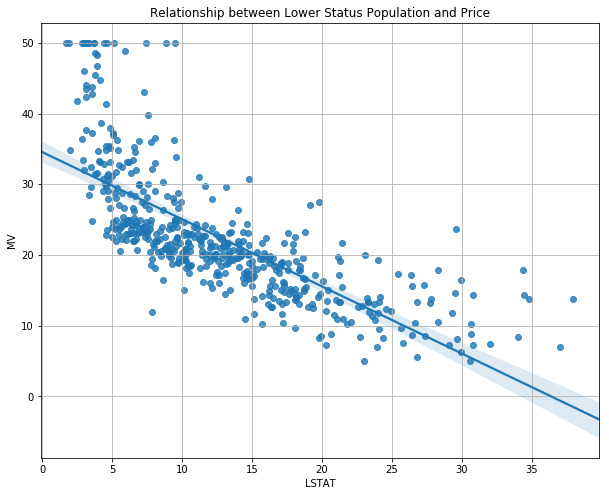

In [10]:
# Between prices and Lower Status Population
plt.figure(figsize=(10,8))
sns.regplot(y="MV",x="LSTAT", data=boston_data, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.grid(True)
plt.show()

* We can LSTAT has a strong negative correlation with price ,as % of population with lower status increases ,the price of
the house is decreasing ,which makes sense and the correlation is -0.73 which we computed earlier

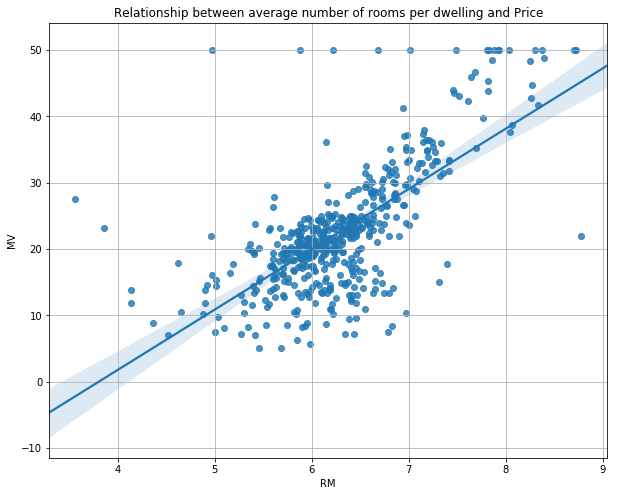

In [11]:
# Between prices and average number of rooms per dwelling
plt.figure(figsize=(10,8))
sns.regplot(y="MV",x="RM", data=boston_data, fit_reg= True)
plt.title("Relationship between average number of rooms per dwelling and Price")
plt.grid(True)
plt.show()

* Strong positive coorelation, as the number of rooms increases, the housing price increases

### Checking the Distribution of each feature

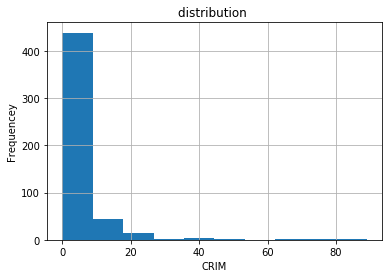

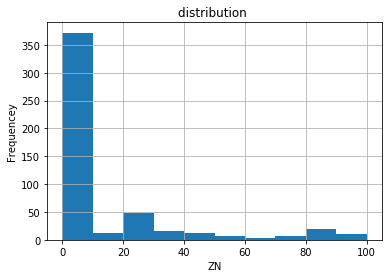

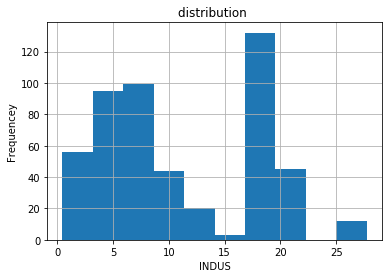

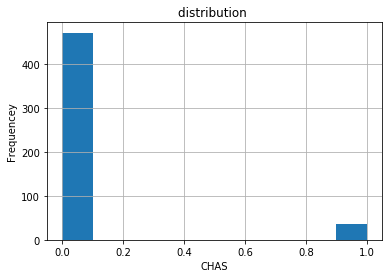

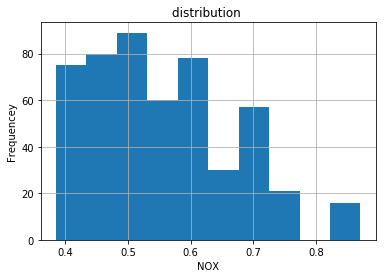

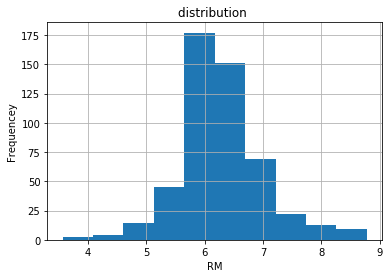

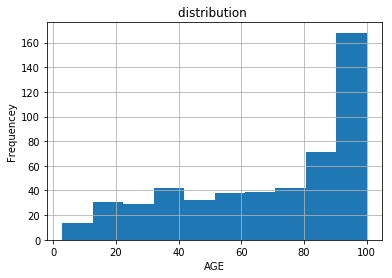

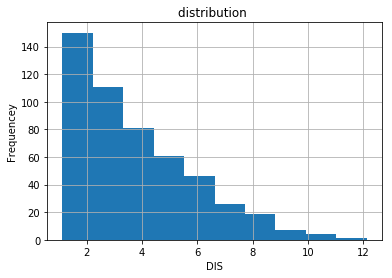

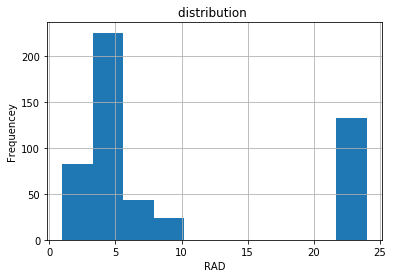

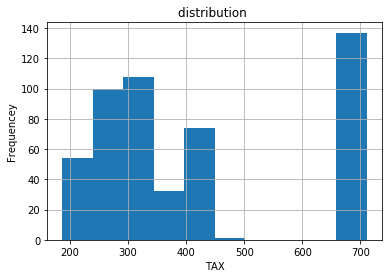

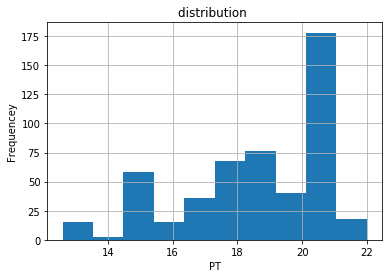

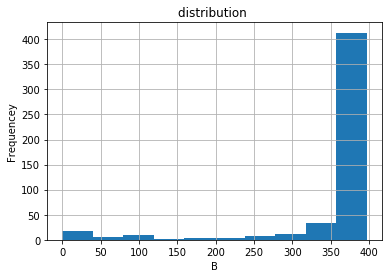

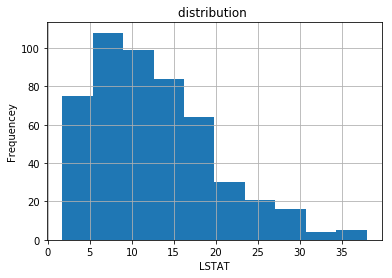

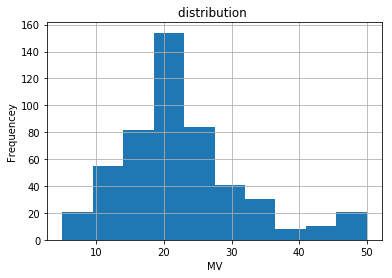

In [12]:
#checking the distribution of each variable
cols = list(boston_data.columns)
for c in cols:
    plt.hist((boston_data[c]))
    plt.title("distribution ")
    plt.xlabel(c)
    plt.ylabel("Frequencey")
    plt.grid(True)
    plt.show()

* CRIM has exponential decay,so we we will do logarthimic transforamtion
* Most of the neighborhoods donot tract Charles River 
* Age feature has a left skewed distibution
* weighted distances to five Boston employment centres (DIS) has right skewed distribution
* LSTAT has a right-skewed distribution

In [13]:
#doing feature transformations
bos = boston_data
bos['CRIM'] = np.log(bos['CRIM'])
bos['LSTAT'] = np.log(bos['LSTAT'])
bos['AGE'] = np.square(bos['AGE'])

In [14]:
#getting the train and test data
Y = (bos["MV"])
X_data = bos.drop("MV",axis =1)

#standardizing the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#standardizing the columns
std_data = MinMaxScaler().fit_transform(X_data)


In [15]:
#spliting data
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(std_data,Y,test_size = 0.3 ,random_state =124 )
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (354, 13)
Test - Predictors shape (152, 13)
Train - Target shape (354,)
Test - Target shape (152,)


### Linear-Regression

In [16]:
#initializing the linear regression model
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = True ,normalize=False,n_jobs = -1)
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

In [17]:
# Compute and print MSE and RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R_squared= lm.score(x_test,y_test)
print("Mean squared error : {}".format(mse))
print("Root Mean Squared Error: {}".format(rmse))


Mean squared error : 23.799171107999726
Root Mean Squared Error: 4.878439413173


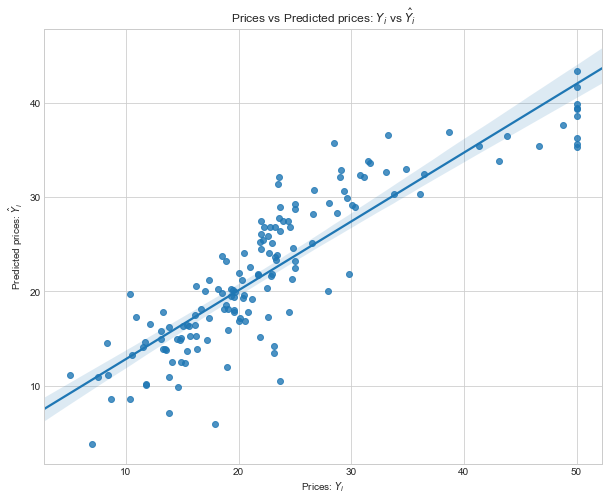

In [18]:
#ploting 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid(True)
plt.show()


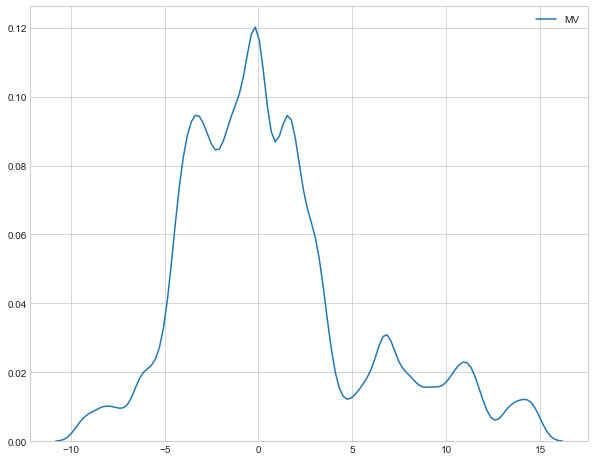

In [19]:
#checking the distribution of erros
y_error  = y_test-y_pred

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.kdeplot((y_error), bw=0.5)
plt.show()

In [20]:
#getting the intercept and coefficients of the fitted linear model
print("Coefficients of best fit line")
print(lm.coef_)
print("Intercept of the Best fit line : {} ".format( lm.intercept_))

Coefficients of best fit line
[  0.10223247   2.19949396   1.15413068   2.44721631  -8.56359847
  11.37030278   2.96274044  -9.70773942   4.92004789  -5.78589198
  -6.98268318   4.33506555 -28.22146822]
Intercept of the Best fit line : 36.905897280028604 


In [21]:
#getting the coefficients of each column
coefficients = pd.DataFrame(lm.coef_,X_data.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,0.102232
ZN,2.199494
INDUS,1.154131
CHAS,2.447216
NOX,-8.563598
RM,11.370303
AGE,2.962740
DIS,-9.707739
RAD,4.920048
TAX,-5.785892


## Regression with Stochastic Gradient Descent

In [22]:
#standardizing the data
from sklearn.preprocessing import MinMaxScaler

#standardizing the columns
std_data1 = MinMaxScaler().fit_transform(boston_data)
from sklearn.model_selection import train_test_split
x_train1 ,x_test1  = train_test_split(std_data1,test_size = 0.3 ,random_state =12488 )

In [23]:
#utility function for predictions
def pred_price(row, coefficients):
    y_pred = coefficients[0]
    for i in range(len(row)-1):
        y_pred += coefficients[i + 1] * row[i]
    return y_pred



#computing optimal weights using sgd
def coefficients_sgd(train, learning_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            y_pred = pred_price(row, coef)
            error = y_pred - row[-1]
            coef[0] = coef[0] - learning_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - learning_rate * error * row[i]

    return coef


#implenting sgd on linear-regression
def linear_regression_sgd(train, test, learning_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, learning_rate, n_epoch)
    for row in test:
        y_pred = pred_price(row, coef)
        predictions.append(y_pred)
    return(predictions)
 
    
coef_sgd = coefficients_sgd(x_train1,0.001,100)   
y_pred_sgd = linear_regression_sgd(x_train1,x_test1,0.01,100)

In [24]:
y_test1 =[]
for i in range(len(x_test1)):
    price = x_test1[i][-1]
    y_test1.append(price)
    
#my_list = y_test1
y_test_final = [((i * 45)+5) for i in y_test1]
#my_list1 = y_pred
y_pred_final = [((i * 45)+5) for i in y_pred_sgd]
mse_sgd = mean_squared_error(y_test_final,y_pred_final)
rmse_sgd =mse_sgd**0.5
print("Mean squared error : {}".format(mse_sgd))
print("Root Mean Squared Error: {}".format(mse_sgd**0.5))


Mean squared error : 23.045074577917465
Root Mean Squared Error: 4.800528572763365


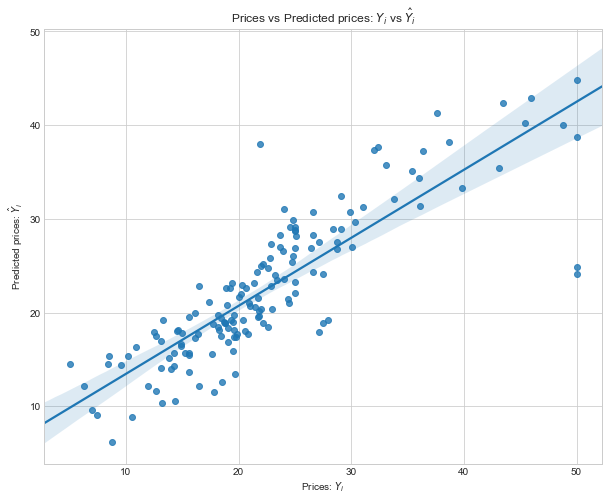

In [25]:
#ploting 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.regplot(x=pd.Series(y_test_final),y=pd.Series(y_pred_final))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid(True)
plt.show()

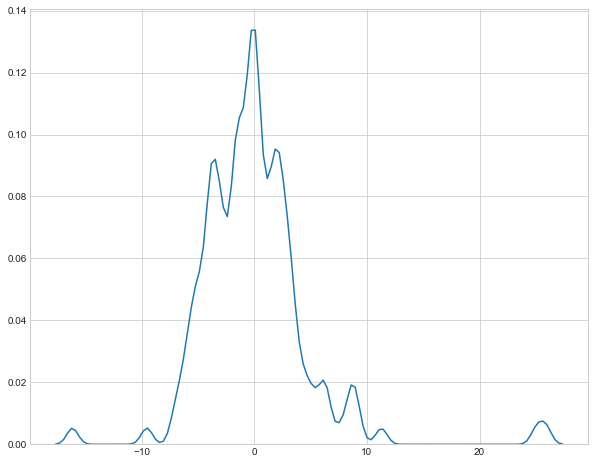

In [26]:
#checking the distribution of erros
y_error_SGD  = pd.Series(y_test_final)-pd.Series(y_pred_final)

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.kdeplot(np.array(y_error_SGD), bw=0.5)
plt.show()

### SGD-Regressor

In [27]:
#initializing SGD-regressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
sgd_reg = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0,
                       fit_intercept=True, max_iter=100, random_state=123, learning_rate='constant',
                       eta0=0.01)
sgd_reg.fit(x_train, y_train)

y_pred2 = sgd_reg.predict(x_test)

In [28]:
# Compute and print MSE and RMSE

mse1 = mean_squared_error(y_test,y_pred2)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("Mean squared error : {}".format(mse1))
print("Root Mean Squared Error: {}".format(rmse1))


Mean squared error : 24.796796575494508
Root Mean Squared Error: 4.979638197248321


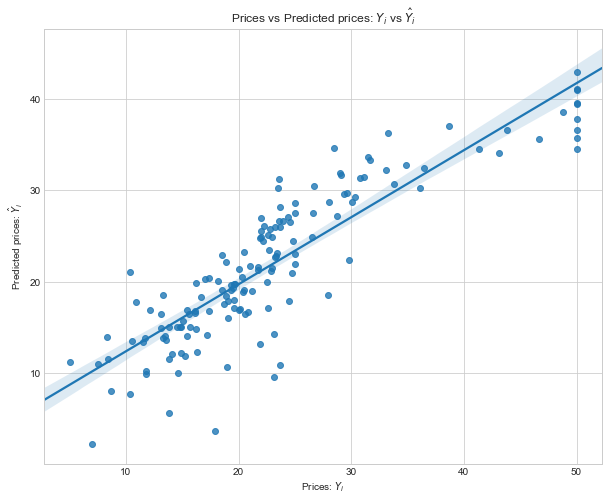

In [30]:
#ploting 
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.regplot(x=y_test,y=y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid(True)
plt.show()


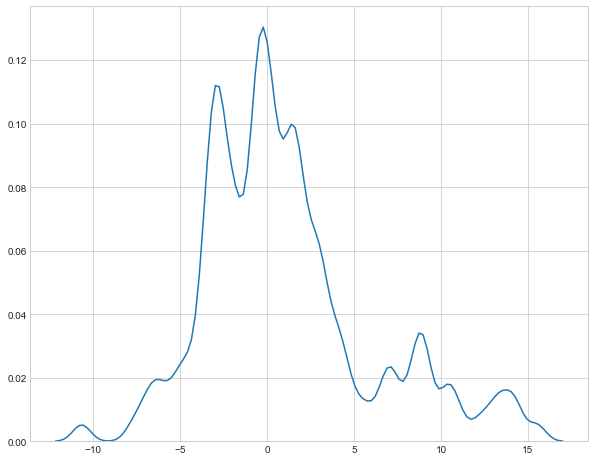

In [33]:
#checking the distribution of erros
y_error1  = y_test-y_pred2

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.kdeplot(np.array(y_error1), bw=0.5)
plt.show()

In [34]:
#getting the intercept and coefficients of the fitted linear model
print("Coefficients of best fit line")
print(sgd_reg.coef_)
print("Intercept of the Best fit line : {} ".format( sgd_reg.intercept_))

Coefficients of best fit line
[  2.47428274   2.28718653   1.17362182   2.42869823  -7.27349978
  17.15725412   1.93884414  -8.23691192   3.25900927  -5.28715235
  -6.38691764   5.55322768 -24.47741277]
Intercept of the Best fit line : [28.8867301] 


In [35]:
#getting the coefficients of each column
coefficients = pd.DataFrame(sgd_reg.coef_,X_data.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,2.474283
ZN,2.287187
INDUS,1.173622
CHAS,2.428698
NOX,-7.273500
RM,17.157254
AGE,1.938844
DIS,-8.236912
RAD,3.259009
TAX,-5.287152


# Conclusions:

In [36]:
#reporting the results in a table
from prettytable import PrettyTable


t= PrettyTable()

t.field_names =["metric/parameter" , "result"]

t.add_row (["Model" ,"Regression"])
t.add_row (["algorithm" ,"Linear-Regression"])
t.add_row (["MSE" ,round(mse,2)])
t.add_row (["RMSE" ,round(rmse,2)])
print(t)
    
    
t1= PrettyTable()

t1.field_names =["metric/parameter" , "result"]

t1.add_row (["Model" ,"Regression"])
t1.add_row (["algorithm" ,"SGD-Regressor"])
t1.add_row (["MSE" ,round(mse1,2)])
t1.add_row (["RMSE" ,round(rmse1,2)])

print(t1)
        
t2= PrettyTable()

t2.field_names =["metric/parameter" , "result"]

t2.add_row (["Model" ,"Regression"])
t2.add_row (["algorithm" ,"SGD"])
t2.add_row (["MSE" ,round(mse_sgd,2)])
t2.add_row (["RMSE" ,round(rmse_sgd,2)])
print(t2)    

+------------------+-------------------+
| metric/parameter |       result      |
+------------------+-------------------+
|      Model       |     Regression    |
|    algorithm     | Linear-Regression |
|       MSE        |        23.8       |
|       RMSE       |        4.88       |
+------------------+-------------------+
+------------------+---------------+
| metric/parameter |     result    |
+------------------+---------------+
|      Model       |   Regression  |
|    algorithm     | SGD-Regressor |
|       MSE        |      24.8     |
|       RMSE       |      4.98     |
+------------------+---------------+
+------------------+------------+
| metric/parameter |   result   |
+------------------+------------+
|      Model       | Regression |
|    algorithm     |    SGD     |
|       MSE        |   23.05    |
|       RMSE       |    4.8     |
+------------------+------------+
